In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = "https://www.cdc.gov/mmwr/volumes/70/wr/mm7015a1.htm"
response = requests.get(url)

In [ ]:
response

<Response [200]>

In [ ]:
content = response.content

In [ ]:
soup = BeautifulSoup(content, "html.parser")

In [ ]:
tables = soup.find_all("table")

In [ ]:
#first table as data frame
columns = []
for th in tables[0].find_all('th'):
  columns.append(th.get_text(strip=True))
rows = []
for tr in tables[0].find_all('tr'):
  entries = tr.find_all('td')
  row = [entry.get_text(strip=True) for entry in entries]
  rows.append(row)
df = pd.DataFrame(rows, columns=columns)
df.head()

,Jurisdiction†,Estimated case count of opioid use disorder,Case count of fatal opioid overdose,"Cost of opioid use disorder, $ (millions)","Cost of fatal opioid overdose, $ (millions)","Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)","Per capita cost of opioid use disorder, $","Per capita cost of fatal opioid overdose, $","Per capita combined cost of opioid use disorder and fatal opioid overdose, $"
0,None,None,None,None,None,None,None,None,None
1,Hawaii,"5,000",53,"1,106.1",612.1,"1,718.1",775,429,"1,204"
2,Minnesota,"16,000",422,"3,539.5","4,873.3","8,412.8",635,874,"1,509"
3,California,"165,000","2,199","36,501.1","25,394.3","61,895.5",923,642,"1,566"
4,Wyoming,"2,000",47,442.4,542.8,985.2,764,937,"1,701"


In [ ]:
df.drop(0)
print()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Jurisdiction†                                                                 39 non-null     object
 1   Estimated case count of opioid use disorder                                   39 non-null     object
 2   Case count of fatal opioid overdose                                           39 non-null     object
 3   Cost of opioid use disorder, $ (millions)                                     39 non-null     object
 4   Cost of fatal opioid overdose, $ (millions)                                   39 non-null     object
 5   Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)  39 non-null     object
 6   Per capita cost of opioid use disorder, $    

In [ ]:
#data cleaning here to translate objects to ints as reading them in caused an issue here
df = df.rename(columns={"Jurisdiction†":"Jurisdiction"})
df['Estimated case count of opioid use disorder'] = df['Estimated case count of opioid use disorder'].replace({r'[^\d.]': ''}, regex=True)
df['Estimated case count of opioid use disorder'] = pd.to_numeric(df['Estimated case count of opioid use disorder'], errors='coerce')
df['Case count of fatal opioid overdose'] = df['Case count of fatal opioid overdose'].replace({r'[^\d.]': ''}, regex=True)
df['Case count of fatal opioid overdose'] = pd.to_numeric(df['Case count of fatal opioid overdose'], errors='coerce')
df['Cost of opioid use disorder, $ (millions)'] = df['Cost of opioid use disorder, $ (millions)'].replace({r'[^\d.]': ''}, regex=True)
df['Cost of opioid use disorder, $ (millions)'] = pd.to_numeric(df['Cost of opioid use disorder, $ (millions)'], errors='coerce')
df['Cost of fatal opioid overdose, $ (millions)'] = df['Cost of fatal opioid overdose, $ (millions)'].replace({r'[^\d.]': ''}, regex=True)
df['Cost of fatal opioid overdose, $ (millions)'] = pd.to_numeric(df['Cost of fatal opioid overdose, $ (millions)'], errors='coerce')
df['Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)'] = df['Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)'].replace({r'[^\d.]': ''}, regex=True)
df['Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)'] = pd.to_numeric(df['Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)'], errors='coerce')
df['Per capita cost of opioid use disorder, $'] = df['Per capita cost of opioid use disorder, $'].replace({r'[^\d.]': ''}, regex=True)
df['Per capita cost of opioid use disorder, $'] = pd.to_numeric(df['Per capita cost of opioid use disorder, $'], errors='coerce')
df['Per capita cost of fatal opioid overdose, $'] = df['Per capita cost of fatal opioid overdose, $'].replace({r'[^\d.]': ''}, regex=True)
df['Per capita cost of fatal opioid overdose, $'] = pd.to_numeric(df['Per capita cost of fatal opioid overdose, $'], errors='coerce')
df['Per capita combined cost of opioid use disorder and fatal opioid overdose, $'] = df['Per capita combined cost of opioid use disorder and fatal opioid overdose, $'].replace({r'[^\d.]': ''}, regex=True)
df['Per capita combined cost of opioid use disorder and fatal opioid overdose, $'] = pd.to_numeric(df['Per capita combined cost of opioid use disorder and fatal opioid overdose, $'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Jurisdiction                                                                  39 non-null     object 
 1   Estimated case count of opioid use disorder                                   39 non-null     float64
 2   Case count of fatal opioid overdose                                           39 non-null     float64
 3   Cost of opioid use disorder, $ (millions)                                     39 non-null     float64
 4   Cost of fatal opioid overdose, $ (millions)                                   39 non-null     float64
 5   Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)  39 non-null     float64
 6   Per capita cost of opioid use disorde

In [ ]:
#central tendencies and varaince of combined between to to get idea of values
#mean, median, variance,
 #Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)
#Per capita combined cost of opioid use disorder and fatal opioid overdose, $
print("Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) mean: ")
print(df.loc[:,"Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)"].mean())
print("Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) median: ")
print(df["Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)"].median())
print("Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) variance: ")
print(df["Combined cost of opioid use disorder and fatal opioid overdose, $ (millions)"].var())
print("Per capita combined cost of opioid use disorder and fatal opioid overdose mean: ")
print(df.loc[:,"Per capita combined cost of opioid use disorder and fatal opioid overdose, $"].mean())
print("Per capita combined cost of opioid use disorder and fatal opioid overdose median: ")
print(df["Per capita combined cost of opioid use disorder and fatal opioid overdose, $"].median())
print("Per capita combined cost of opioid use disorder and fatal opioid overdose variance: ")
print(df["Per capita combined cost of opioid use disorder and fatal opioid overdose, $"].var())


Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) mean: 
22393.371794871793
Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) median: 
17222.6
Combined cost of opioid use disorder and fatal opioid overdose, $ (millions) variance: 
372356376.12365705
Per capita combined cost of opioid use disorder and fatal opioid overdose mean: 
3553.923076923077
Per capita combined cost of opioid use disorder and fatal opioid overdose median: 
3337.0
Per capita combined cost of opioid use disorder and fatal opioid overdose variance: 
1926042.3360323887


In [ ]:
df1 = pd.read_csv("OUD_and_FOO.csv")

In [ ]:
df1.head()

,Jurisdiction,Estimated case counts of opioid use disorder,OUD:Health care,OUD:Substance use treatment,OUD:Criminal justice,OUD:Lost productivity,OUD:Reduced quality of life,Case counts of fatal opioid overdose,FOO:Health care,FOO:Lost productivity,FOO:Value of statistical life lost
0,Hawaii,5000.0,73.5,8.3,34.8,73.5,915.9,53.0,0.3,76.5,535.3
1,Minnesota,16000.0,235.3,26.6,111.4,235.3,2931.0,422.0,2.3,609.0,4262.0
2,California,165000.0,2426.4,273.9,1148.5,2426.6,30225.7,2199.0,12.0,3173.5,22208.8
3,Wyoming,2000.0,29.4,3.3,13.9,29.4,366.4,47.0,0.3,67.8,474.7
4,Texas,146000.0,2147.0,242.4,1016.2,2147.2,26745.2,1458.0,8.0,2104.1,14725.1


In [ ]:
df1.head()

,Jurisdiction,Estimated case counts of opioid use disorder,OUD:Health care,OUD:Substance use treatment,OUD:Criminal justice,OUD:Lost productivity,OUD:Reduced quality of life,Case counts of fatal opioid overdose,FOO:Health care,FOO:Lost productivity,FOO:Value of statistical life lost
0,Hawaii,5000.0,73.5,8.3,34.8,73.5,915.9,53.0,0.3,76.5,535.3
1,Minnesota,16000.0,235.3,26.6,111.4,235.3,2931.0,422.0,2.3,609.0,4262.0
2,California,165000.0,2426.4,273.9,1148.5,2426.6,30225.7,2199.0,12.0,3173.5,22208.8
3,Wyoming,2000.0,29.4,3.3,13.9,29.4,366.4,47.0,0.3,67.8,474.7
4,Texas,146000.0,2147.0,242.4,1016.2,2147.2,26745.2,1458.0,8.0,2104.1,14725.1


In [ ]:
df1.describe()

,Estimated case counts of opioid use disorder,OUD:Health care,OUD:Substance use treatment,OUD:Criminal justice,OUD:Lost productivity,OUD:Reduced quality of life,Case counts of fatal opioid overdose,FOO:Health care,FOO:Lost productivity,FOO:Value of statistical life lost
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,45820.512821,673.815385,76.066667,318.933333,673.869231,8393.674359,1061.384615,5.797436,1531.733333,10719.464103
std,40662.844669,597.970377,67.504064,283.034432,598.028413,7448.866348,984.694519,5.367077,1421.059371,9944.930345
min,2000.000000,29.400000,3.300000,13.900000,29.400000,366.400000,47.000000,0.300000,67.800000,474.700000
25%,16000.000000,235.300000,26.600000,111.400000,235.300000,2931.000000,352.000000,1.950000,507.950000,3555.000000
50%,35000.000000,514.700000,58.100000,243.600000,514.700000,6411.500000,833.000000,4.600000,1202.100000,8412.900000
75%,65000.000000,955.850000,107.900000,452.450000,955.950000,11907.100000,1363.500000,7.450000,1967.750000,13770.700000
max,165000.000000,2426.400000,273.900000,1148.500000,2426.600000,30225.700000,4293.000000,23.400000,6195.400000,43357.200000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Jurisdiction                                  39 non-null     object 
 1   Estimated case counts of opioid use disorder  39 non-null     float64
 2   OUD:Health care                               39 non-null     float64
 3   OUD:Substance use treatment                   39 non-null     float64
 4   OUD:Criminal justice                          39 non-null     float64
 5   OUD:Lost productivity                         39 non-null     float64
 6   OUD:Reduced quality of life                   39 non-null     float64
 7   Case counts of fatal opioid overdose          39 non-null     float64
 8   FOO:Health care                               39 non-null     float64
 9   FOO:Lost productivity                         39 non-null     float

In [ ]:
print("FOO:Health care mean: ")
print(df1.loc[:,"FOO:Health care"].mean())
print("FOO:Health care median: ")
print(df1["FOO:Health care"].median())
print("FOO:Health care variance: ")
print(df1["FOO:Health care"].var())
print("FOO:Value of statistical life lost mean: ")
print(df1.loc[:,"FOO:Value of statistical life lost"].mean())
print("FOO:Value of statistical life lost median: ")
print(df1["FOO:Value of statistical life lost"].median())
print("FOO:Value of statistical life lost variance: ")
print(df1["FOO:Value of statistical life lost"].var())


FOO:Health care mean: 
5.797435897435898
FOO:Health care median: 
4.6
FOO:Health care variance: 
28.805519568151148
FOO:Value of statistical life lost mean: 
10719.464102564105
FOO:Value of statistical life lost median: 
8412.9
FOO:Value of statistical life lost variance: 
98901639.55709851


Text(0.5, 1.0, 'Distribution of Cases')

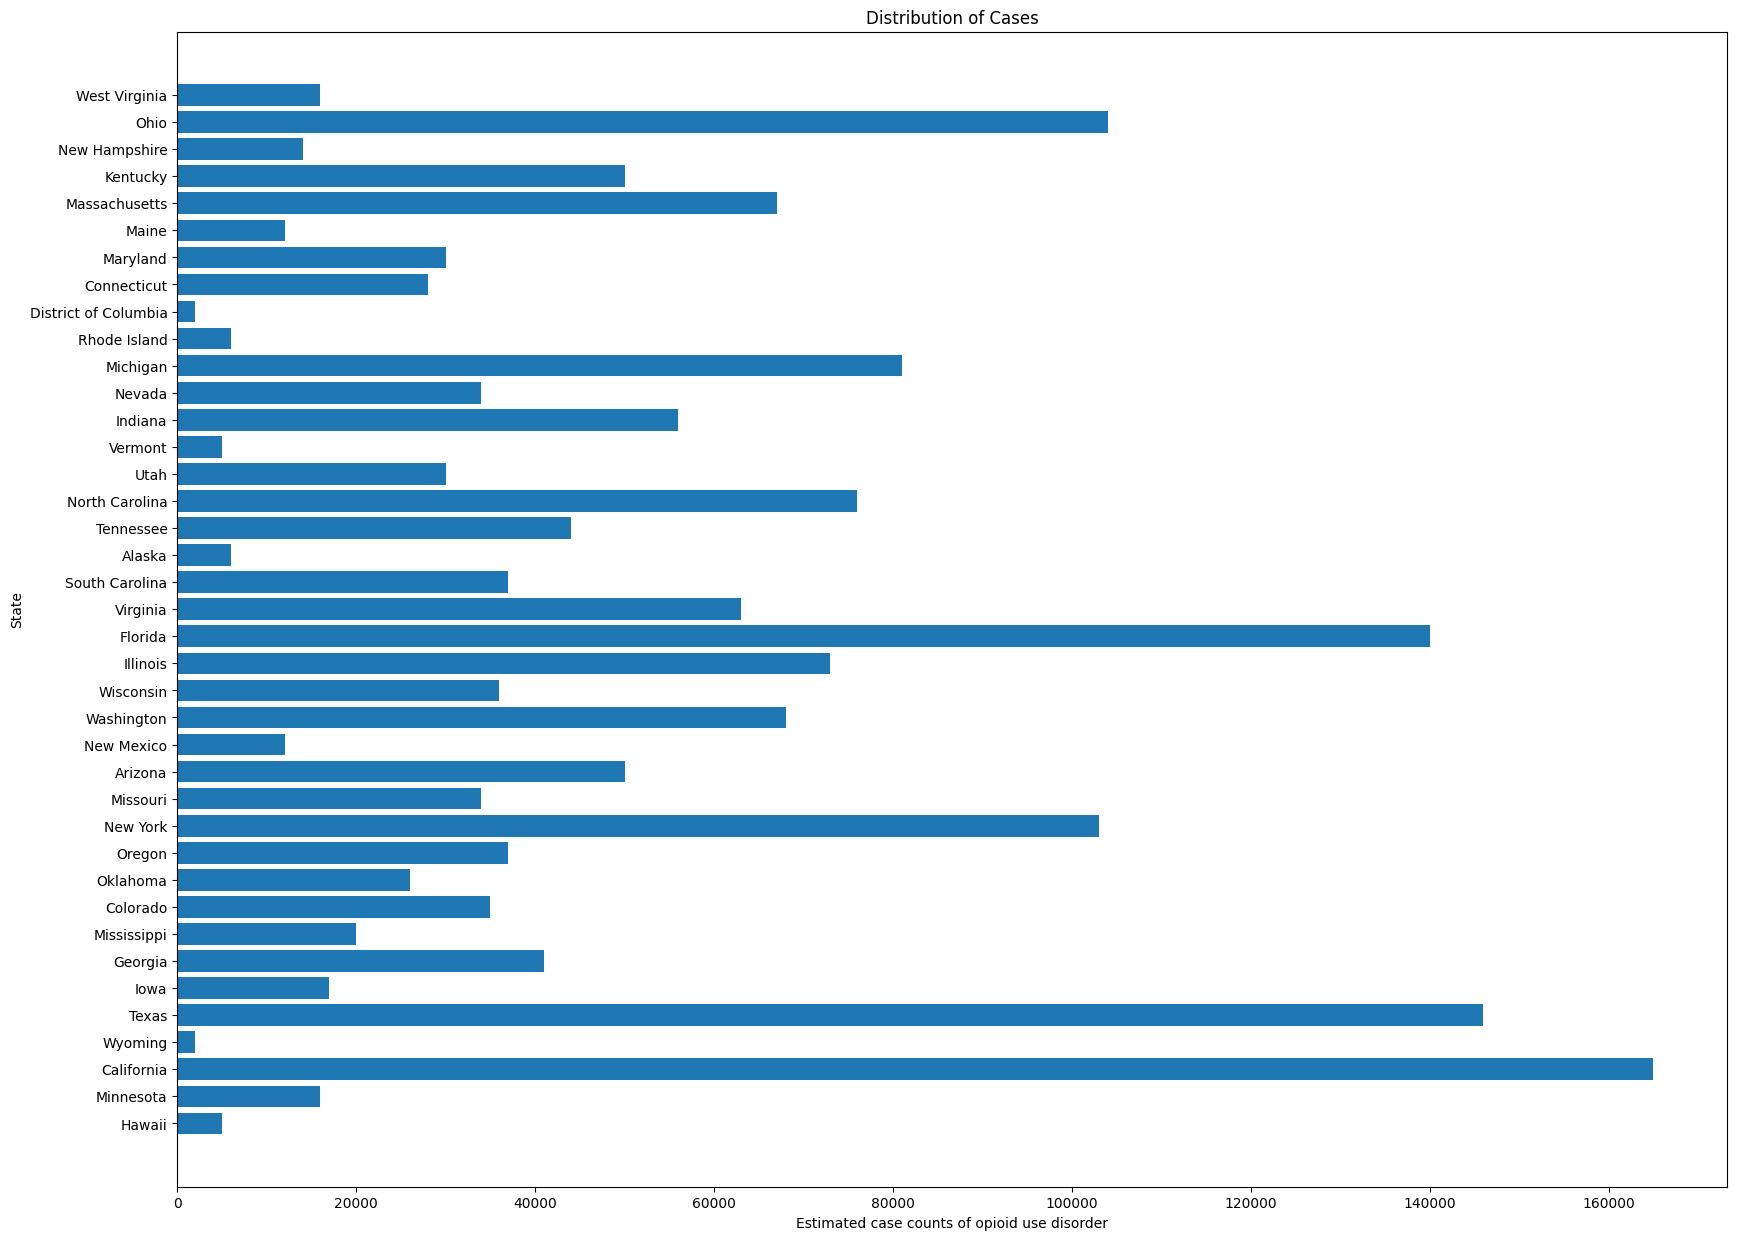

In [ ]:
fig= plt.figure(figsize=(20, 15))
plt.barh(df1.loc[:,'Jurisdiction'],df1.loc[:,'Estimated case counts of opioid use disorder'])
plt.xlabel('Estimated case counts of opioid use disorder')
plt.ylabel('State')
plt.title('Distribution of Cases')

The above visualization is a pie chart about the proportion of each state does for the total amount of cases of Opiod Use Disorder. We can see that California, Texas, and Florida being the biggest contributors. This is interesting as the populations are different, but they all seem to contribute similar amounts to the total. Even with states with a ton of cities where people tend to associate drug use issues with lots of urban populations or blue states such as Illinois or California.

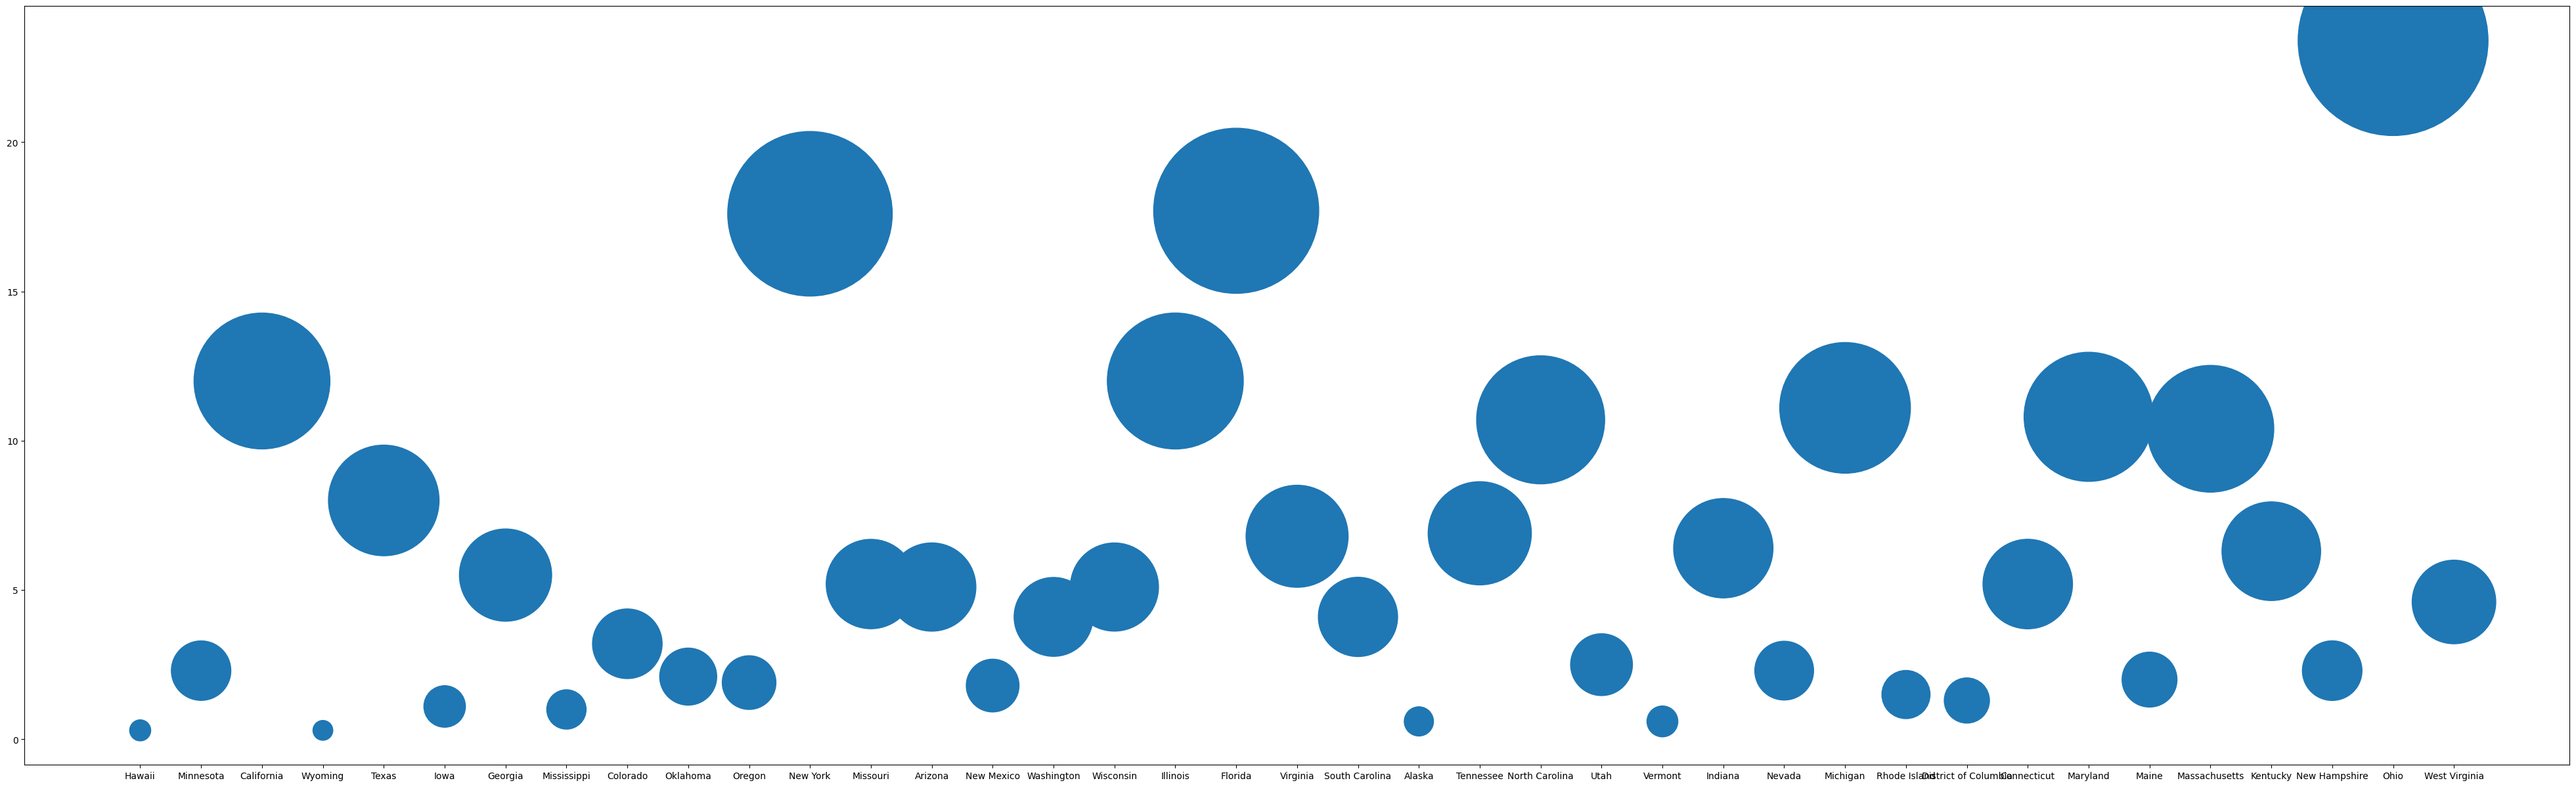

In [ ]:
fig = fig= plt.figure(figsize=(50, 15))
plt.scatter(x="Jurisdiction", y="FOO:Health care", s="FOO:Value of statistical life lost", data=df1)

This is a bubble plot that helps visualize values in a 2D type of scatter plot. This plot shows us the Jurisdiction, or the state, and the values of Fatal Opioid Overdoses cost in Health Care and Value of Statistical life lost. This graph demonstrates a trend that with more health care spent (higher on the y-axis) the state tends to have more of a higher value of life lost. This shows a great proportion between these and a correlation to these two variables in the spending and the importance of the poeple who did overdose due to opioid and was fatal.

In [ ]:
df1.head()

,Jurisdiction,Estimated case counts of opioid use disorder,OUD:Health care,OUD:Substance use treatment,OUD:Criminal justice,OUD:Lost productivity,OUD:Reduced quality of life,Case counts of fatal opioid overdose,FOO:Health care,FOO:Lost productivity,FOO:Value of statistical life lost
0,Hawaii,5000.0,73.5,8.3,34.8,73.5,915.9,53.0,0.3,76.5,535.3
1,Minnesota,16000.0,235.3,26.6,111.4,235.3,2931.0,422.0,2.3,609.0,4262.0
2,California,165000.0,2426.4,273.9,1148.5,2426.6,30225.7,2199.0,12.0,3173.5,22208.8
3,Wyoming,2000.0,29.4,3.3,13.9,29.4,366.4,47.0,0.3,67.8,474.7
4,Texas,146000.0,2147.0,242.4,1016.2,2147.2,26745.2,1458.0,8.0,2104.1,14725.1


In [ ]:
df1['FOO sum'] = df1[['FOO:Health care', 'FOO:Lost productivity', 'FOO:Value of statistical life lost']].sum(axis=1)
df1['OUD sum'] = df1[['OUD:Health care', 'OUD:Substance use treatment', 'OUD:Criminal justice','OUD:Lost productivity','OUD:Reduced quality of life']].sum(axis=1)

In [ ]:
from sklearn.cluster import KMeans

df1_sub = df1[['OUD sum','FOO sum']]
kmeans = KMeans(n_clusters=6,random_state=42,init='k-means++',n_init=10)
kmeans.fit_transform(df1_sub)


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:", centroids)

Centroids: [[ 2156.85        2661.84166667]
 [14467.76       23294.86      ]
 [25587.66666667 41426.9       ]
 [11756.18571429 12422.48571429]
 [34399.55       21115.75      ]
 [ 6924.16        7613.68      ]]


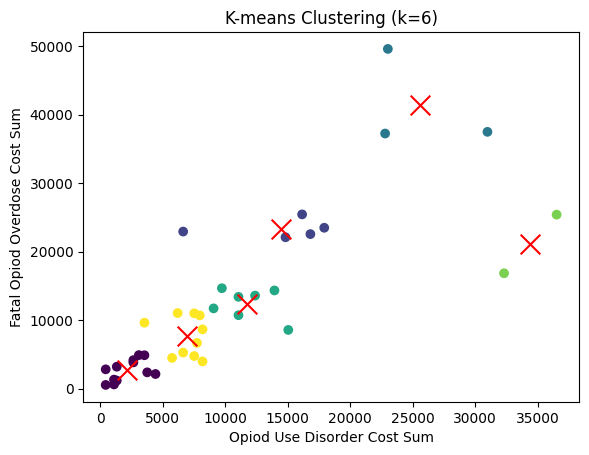

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df1_sub['OUD sum'], df1_sub['FOO sum'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x',s=200)
plt.xlabel("Opiod Use Disorder Cost Sum")
plt.ylabel("Fatal Opiod Overdose Cost Sum")
plt.title("K-means Clustering (k=6)")
plt.show()

In [ ]:
df1['labels'] = kmeans.labels_
df1

,Jurisdiction,Estimated case counts of opioid use disorder,OUD:Health care,OUD:Substance use treatment,OUD:Criminal justice,OUD:Lost productivity,OUD:Reduced quality of life,Case counts of fatal opioid overdose,FOO:Health care,FOO:Lost productivity,FOO:Value of statistical life lost,FOO sum,OUD sum,labels
0,Hawaii,5000.0,73.5,8.3,34.8,73.5,915.9,53.0,0.3,76.5,535.3,612.1,1106.0,0
1,Minnesota,16000.0,235.3,26.6,111.4,235.3,2931.0,422.0,2.3,609.0,4262.0,4873.3,3539.6,0
2,California,165000.0,2426.4,273.9,1148.5,2426.6,30225.7,2199.0,12.0,3173.5,22208.8,25394.3,36501.1,4
3,Wyoming,2000.0,29.4,3.3,13.9,29.4,366.4,47.0,0.3,67.8,474.7,542.8,442.4,0
4,Texas,146000.0,2147.0,242.4,1016.2,2147.2,26745.2,1458.0,8.0,2104.1,14725.1,16837.2,32298.0,4
5,Iowa,17000.0,250.0,28.2,118.3,250.0,3114.2,206.0,1.1,297.3,2080.5,2378.9,3760.7,0
6,Georgia,41000.0,602.9,68.1,285.4,603.0,7510.6,1014.0,5.5,1463.4,10240.9,11709.8,9070.0,3
7,Mississippi,20000.0,294.1,33.2,139.2,294.1,3663.7,185.0,1.0,267.0,1868.4,2136.4,4424.3,0
8,Colorado,35000.0,514.7,58.1,243.6,514.7,6411.5,578.0,3.2,834.1,5837.5,6674.8,7742.6,5
9,Oklahoma,26000.0,382.3,43.2,181.0,382.4,4762.8,388.0,2.1,559.9,3918.6,4480.6,5751.7,5


In [ ]:
print(enumerate(zip(df1['Jurisdiction'].values,kmeans.labels_)))

In [ ]:
from sklearn.metrics import silhouette_score
kmeans_labels = kmeans.fit_predict(df1_sub)
score = silhouette_score(df1_sub, kmeans_labels)

In [ ]:
score

np.float64(0.4661389176478997)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df1.drop(['Estimated case counts of opioid use disorder','Jurisdiction'],axis=1)  # Replace with your feature columns
y = df1['Estimated case counts of opioid use disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficients:', lr.coef_)


Root Mean Squared Error: 0.14196930309752
Coefficients: [-1.71776768e+00 -1.15745365e+00  1.09068862e+00 -1.90840663e+00
  4.61073648e+00  1.81731041e+01  9.28636152e-01  3.39234293e-01
 -1.53870077e+00 -2.70830328e-01  9.17797127e-01 -9.77841159e-03]


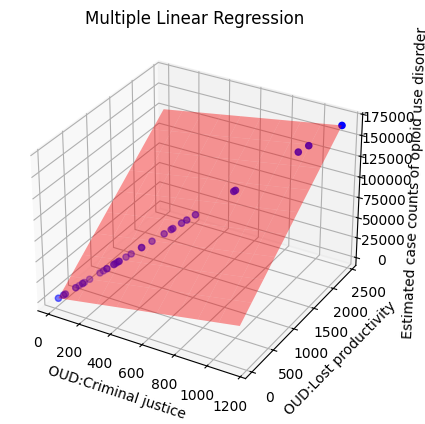

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df1['OUD:Criminal justice']
y = df1['OUD:Lost productivity']
z = df1['Estimated case counts of opioid use disorder']

ax.scatter(x, y, z, color='blue', label='Data Points', zorder=5)

A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)
x_plane, y_plane = np.meshgrid(np.linspace(x.min(), x.max(), 10),
                               np.linspace(y.min(), y.max(), 10))
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

ax.plot_surface(x_plane, y_plane, z_plane, color='red', alpha=0.4, label='Regression Plane')

# Labels
ax.set_xlabel('OUD:Criminal justice')
ax.set_ylabel('OUD:Lost productivity')
ax.set_zlabel('Estimated case counts of opioid use disorder')
plt.title('Multiple Linear Regression')

plt.show()